In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


# Import the necessary libraries

In [2]:
import os
import gc
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# load data and do some data processing

In [3]:
cs_train = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
cs_test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')
target_test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv')
train_process = cs_train.fillna(cs_train.mean())
test_process = cs_test.fillna(cs_test.mean())
features = train_process.columns[2:13]
X_train = train_process[features]
y_train = train_process['SeriousDlqin2yrs']
X_test = test_process[features]
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
y_target = np.zeros(shape = (0,len(target_test)))
y_target = np.round(target_test.iloc[:,1])

# Adjust C to select the 2 most important features using LogisticRegression with L1 penalty

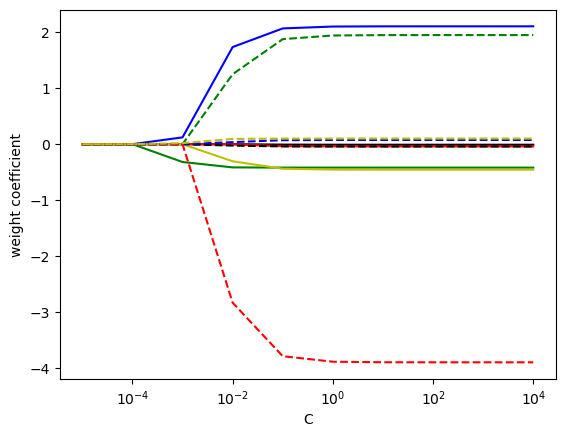

In [4]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(penalty='l1',C=10.**c, 
                            random_state=1,
                            solver='liblinear',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)
weights = np.array(weights)
weights.shape
plt.plot(params, weights[:, 0], color='k', linestyle='-', label='RevolvingUtilizationOfUnsecuredLines')
plt.plot(params, weights[:, 1], color='g', linestyle='-', label='age')
plt.plot(params, weights[:, 2], color='b', linestyle='-', label='NumberOfTime30-59DaysPastDueNotWorse')
plt.plot(params, weights[:, 3], color='r', linestyle='-', label='DebtRatio')
plt.plot(params, weights[:, 4], color='y', linestyle='-', label='MonthlyIncome')
plt.plot(params, weights[:, 5], color='k', linestyle='--', label='NumberOfOpenCreditLinesAndLoans')
plt.plot(params, weights[:, 6], color='g', linestyle='--', label='NumberOfTimes90DaysLate')
plt.plot(params, weights[:, 7], color='b', linestyle='--', label='NumberRealEstateLoansOrLines')
plt.plot(params, weights[:, 8], color='r', linestyle='--', label='NumberOfTime60-89DaysPastDueNotWorse')
plt.plot(params, weights[:, 9], color='y', linestyle='--', label='NumberOfDependents')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

# Enlarge part of the picture

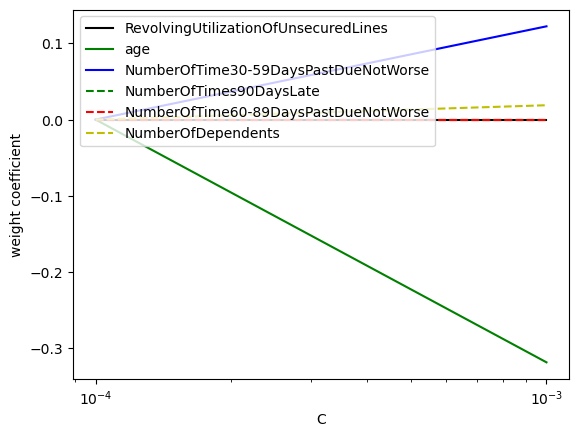

In [5]:
weights, params = [], []
for c in np.arange(-4, -2):
    lr = LogisticRegression(penalty='l1',C=10.**c, 
                            random_state=1,
                            solver='liblinear',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)
weights = np.array(weights)
weights.shape
plt.plot(params, weights[:, 0], color='k', linestyle='-', label='RevolvingUtilizationOfUnsecuredLines')
plt.plot(params, weights[:, 1], color='g', linestyle='-', label='age')
plt.plot(params, weights[:, 2], color='b', linestyle='-', label='NumberOfTime30-59DaysPastDueNotWorse')
plt.plot(params, weights[:, 6], color='g', linestyle='--', label='NumberOfTimes90DaysLate')
plt.plot(params, weights[:, 8], color='r', linestyle='--', label='NumberOfTime60-89DaysPastDueNotWorse')
plt.plot(params, weights[:, 9], color='y', linestyle='--', label='NumberOfDependents')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

# Through the figure above, the feature I select are ‘age’ and ‘NumberOfTime30-59DaysPastDueNotWorse’

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')  

# Using LR algorithm and C is 0.00001. Visualize my classifiers and display the prediction accuracy rate of the model on cs_test dataset

When C is 0.00001, the model accuracy rate is0.98320246692216


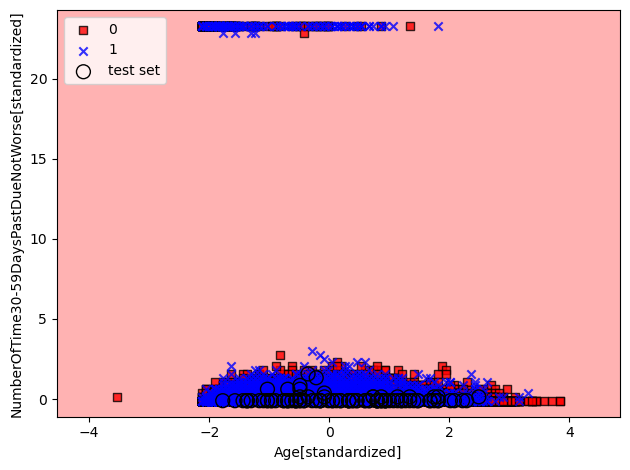

In [7]:
select_train = train_process.iloc[:,3:5]
select_y_train = y_train
select_test = test_process.iloc[:,3:5]
Sx_train, Sx_test, sy_train, sy_test = train_test_split(
    select_train, select_y_train, test_size=0.3, random_state=1, stratify=select_y_train)
sc = StandardScaler()
sc.fit(Sx_train)
Sx_train_std = sc.transform(Sx_train)
Sx_test_std = sc.transform(Sx_test)
Sx_predict_std = sc.transform(select_test)
Sx_combined_std = np.vstack((Sx_train_std, Sx_test_std))
sy_combined = np.hstack((sy_train, sy_test))
LR = LogisticRegression(C=0.00001, random_state=1, solver='lbfgs')
LR.fit(Sx_train_std, sy_train)
Sy_predict = LR.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When C is 0.00001, the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=LR, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Change C value to 0.0001,see the accuracy of the classifier

When C is 0.0001, the model accuracy rate is0.9832714304010719


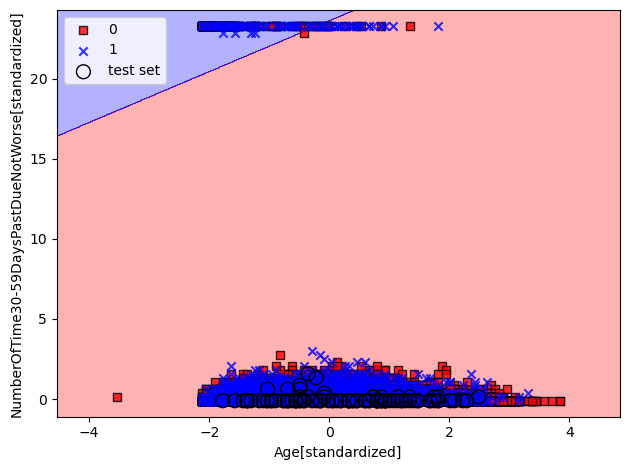

In [8]:
LR = LogisticRegression(C=0.0001, random_state=1, solver='lbfgs')
LR.fit(Sx_train_std, sy_train)
Sy_predict = LR.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When C is 0.0001, the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=LR, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Change C value to 0.001,see the accuracy of the classifier

When C is 0.001, the model accuracy rate is0.9836359516467493


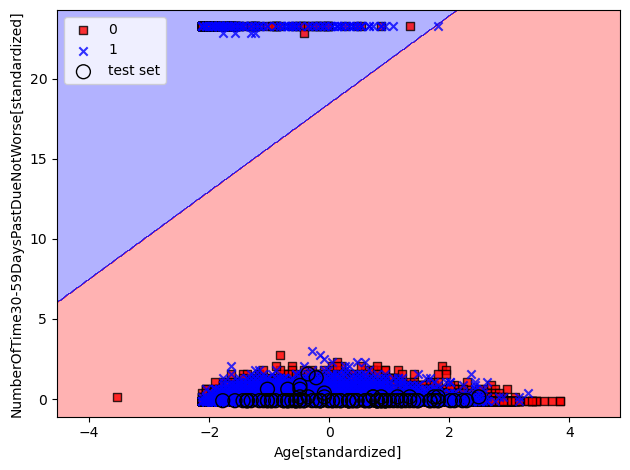

In [9]:
LR = LogisticRegression(C=0.001, random_state=1, solver='lbfgs')
LR.fit(Sx_train_std, sy_train)
Sy_predict = LR.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When C is 0.001, the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=LR, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# We can find that with the increase of C value, the accuracy of the classifier becomes higher and higher

# Using SVM algorithm, set kernel function is linear and C is equal to 10.0. Visualize my classifiers and display the prediction accuracy rate of the model on cs_test dataset

When C is 10.0 the model accuracy rate is0.98320246692216


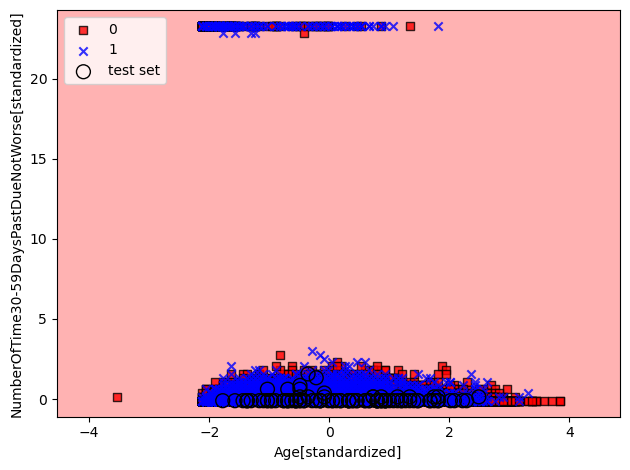

In [10]:
svm = SVC(kernel='linear', C=10.0, random_state=1)
svm.fit(Sx_train_std, sy_train)
Sy_predict = svm.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When C is 10.0 the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=svm, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Change C value to 100.0,see the accuracy of the classifier

When C is 100.0 the model accuracy rate is0.9836359516467493


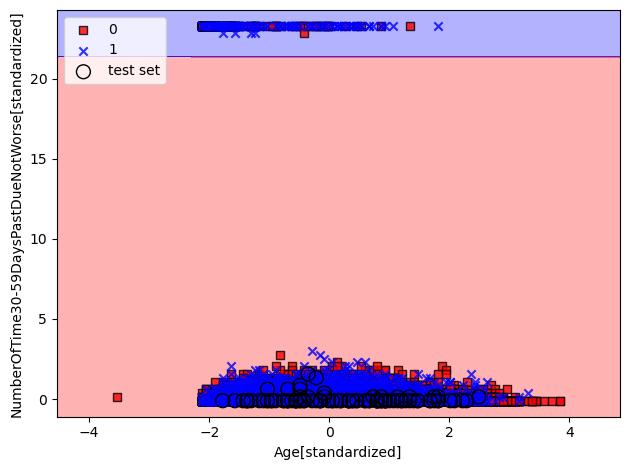

In [11]:
svm = SVC(kernel='linear', C=100.0, random_state=1)
svm.fit(Sx_train_std, sy_train)
Sy_predict = svm.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When C is 100.0 the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=svm, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Change C value from 10 to 100, the accuracy of the classifier becomes higher

# Using  decisionTree algorithm, set criterion  is 'gini' and max_depth is equal to 3. Visualize my classifiers and display the prediction accuracy rate of the model on cs_test dataset

When max_depth is 3 the model accuracy rate is0.98320246692216


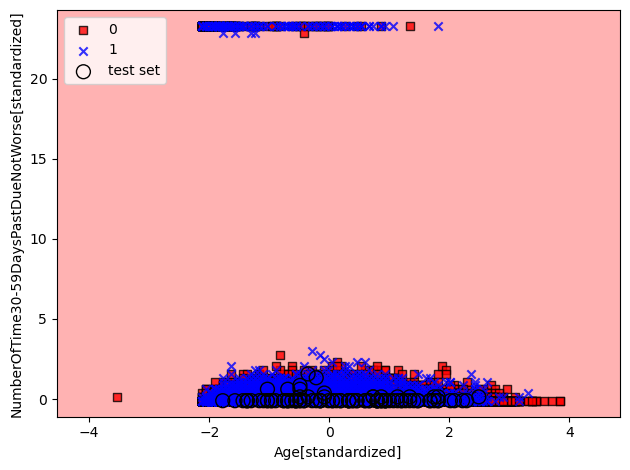

In [12]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=3, 
                                    random_state=1)
tree_model.fit(Sx_train_std, sy_train)
Sy_predict = tree_model.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When max_depth is 3 the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=tree_model, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Change max_depth value to 4,see the accuracy of the classifier

When max_depth is 4 the model accuracy rate is0.9836950632001025


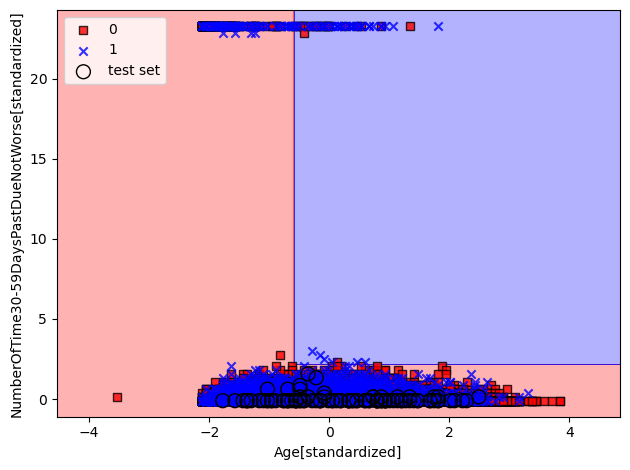

In [13]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(Sx_train_std, sy_train)
Sy_predict = tree_model.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When max_depth is 4 the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=tree_model, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Change max_depth value to 5,see the accuracy of the classifier

When max_depth is 5 the model accuracy rate is0.9833108381033073


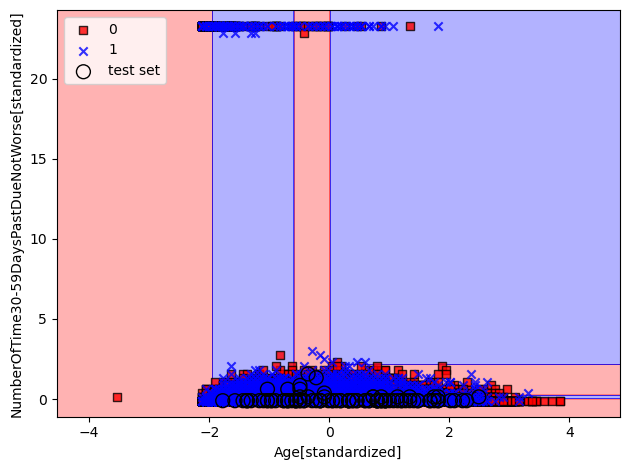

In [14]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    random_state=1)
tree_model.fit(Sx_train_std, sy_train)
Sy_predict = tree_model.predict(Sx_predict_std)
Error = Sy_predict-y_target.T
count = np.count_nonzero(Error)
Accuracy_rate = 1-count/len(Error)
print('When max_depth is 5 the model accuracy rate is'+str(Accuracy_rate))

plot_decision_regions(Sx_combined_std, sy_combined,
                      classifier=tree_model, test_idx=range(300, 400))
plt.xlabel('Age[standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# The max_depth value that maximizes the classification accuracy of the classifier is 4.0